In [ ]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from lightgbm import LGBMClassifier
import itertools




Reading the malicious csv file from drive


In [ ]:
df = pd.read_csv("//content//drive//MyDrive//urlwebsite//malicious_phish.csv")

In [ ]:
df.head(5)

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


Getting the info about the datarame, checking for the duplicates and null values, then removing them


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
df.duplicated().sum()

10066

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


Total number of unique categories in the DataFrame

In [ ]:
df['type'].value_counts()

benign        428080
defacement     95308
phishing       94092
malware        23645
Name: type, dtype: int64

Getting the urls of each category in the datafame and counverting them all into a single string separated by space in order to generate the wordcloud

**wordcloud**

A word cloud is a visual representation of text data in which words are displayed in varying sizes and colors. The size of each word is typically proportional to its frequency or importance within the given text. Word clouds are a popular way to depict the most frequently occurring words in a body of text and provide a quick visual summary of the key terms

In [ ]:
b = df[df['type']=="benign"]
safe = " ".join(i for i in b['url'])


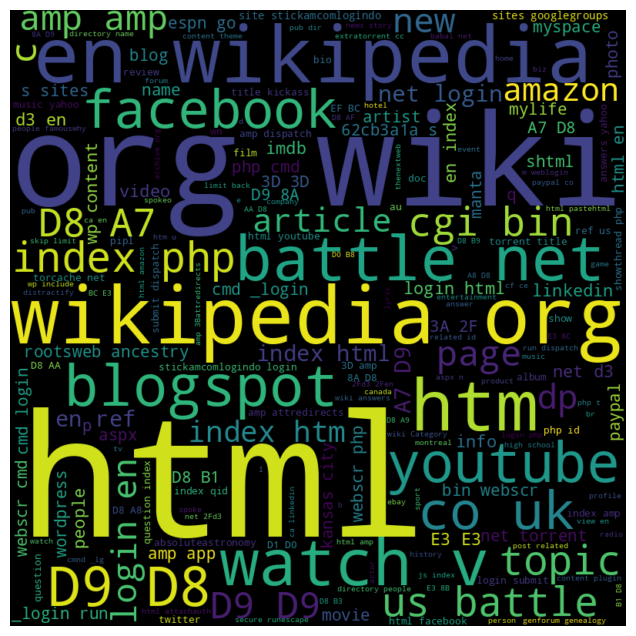

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=800,height=800,background_color= "Black").generate(safe)
plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation="bilinear")
plt.axis("OFF")
plt.show()

In [ ]:
# for phising url category

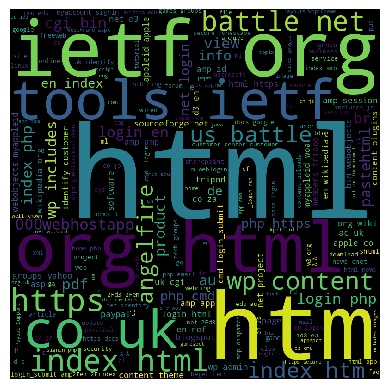

<Figure size 1500x800 with 0 Axes>

In [ ]:
p = df[df['type']=="phishing"]
phish = " ".join(i for i in p['url'])
wc = WordCloud(width=800,height=800,background_color = "Black").generate(phish)
plt.imshow(wc,interpolation="nearest")
plt.axis('OFF')
plt.figure(figsize=(15,8))
plt.show()

In [ ]:
# for malicious url category

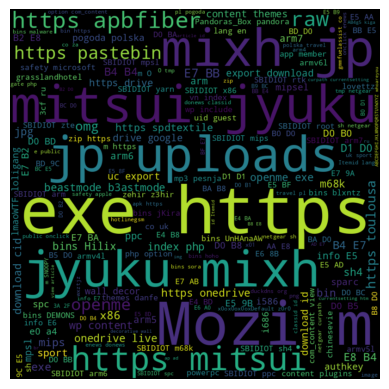

<Figure size 1500x800 with 0 Axes>

In [ ]:
m = df[df['type']=="malware"]
malware = " ".join(i for i in m['url'])

wc = WordCloud(width=800,height=800,background_color = "Black").generate(malware)
plt.imshow(wc,interpolation="bilinear")
plt.axis('OFF')
plt.figure(figsize=(15,8))
plt.show()

In [ ]:
# for defacement url category

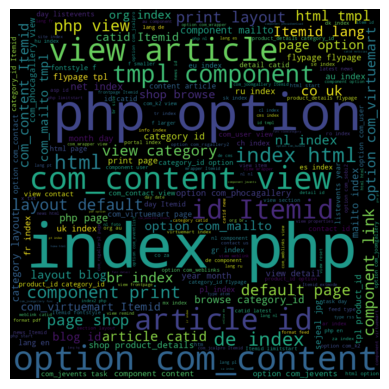

<Figure size 1500x800 with 0 Axes>

In [ ]:
d = df[df['type']=="defacement"]
defacement = " ".join(i for i in d['url'])

wc = WordCloud(width=800,height=800,background_color = "Black").generate(defacement)
plt.imshow(wc,interpolation="bilinear")
plt.axis('OFF')
plt.figure(figsize=(15,8))
plt.show()

#  Feature Engineering


In [ ]:
import re

def having_ip_address(url):
    # Define a regular expression pattern to match IPv4, IPv4 in hexadecimal, and IPv6
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # IPv6

    if match:
        # If the regular expression pattern is found in the URL, return 1 (indicating the presence of an IP address)
        return 1
    else:
        # If no matching pattern is found, return 0 (indicating no IP address)
        return 0


In [ ]:
df['USE_OF_IP'] = df['url'].apply(lambda i : having_ip_address(i))
df['USE_OF_IP']

0         0
1         0
2         0
3         0
4         0
         ..
651186    0
651187    0
651188    0
651189    0
651190    0
Name: USE_OF_IP, Length: 641125, dtype: int64

In [ ]:
from  urllib.parse import urlparse

# to check whether there is a  hostname in each url

def search_for_hostname(url):
  hostname = urlparse(url).hostname
  hostname = str(hostname)

  match = re.search(hostname,url)
  if match:
    return 1
  else:
    return 0

df['Hostname'] = df['url'].apply(lambda i : search_for_hostname(i))

In [ ]:
df['Hostname']

0         0
1         0
2         0
3         1
4         1
         ..
651186    0
651187    0
651188    0
651189    0
651190    0
Name: Hostname, Length: 641125, dtype: int64

In [ ]:
!pip install googlesearch-python

In [ ]:
from googlesearch import search

# to find whether the each url is indexed in google or not, if not it is most likely to be a malicious one

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [ ]:
df['google_index']

0         1
1         1
2         1
3         1
4         1
         ..
651186    1
651187    1
651188    1
651189    1
651190    1
Name: google_index, Length: 641125, dtype: int64

In [ ]:
# counting the number of times these specific characters are occured in the url to create new columns [url analysis]

df['count-@'] = df['url'].apply(lambda x: x.count('@'))
df['count--'] = df['url'].apply(lambda x:x.count("-"))
df['count-?'] = df['url'].apply(lambda x:x.count("?"))
df['count.'] = df['url'].apply(lambda x:x.count("."))
df['count-%'] = df['url'].apply(lambda x:x.count("%"))
df['count-='] = df['url'].apply(lambda x:x.count("="))
df['count-+'] = df['url'].apply(lambda x:x.count("+"))
df['count-*'] = df['url'].apply(lambda x:x.count("*"))
df['count-//'] = df['url'].apply(lambda x:x.count("//"))
df['count_www'] = df['url'].apply(lambda x:x.count("www"))
df['count_http'] = df['url'].apply(lambda x:x.count("http"))
df['count_https'] = df['url'].apply(lambda x:x.count("https"))
df['len_of_url'] = df['url'].apply(lambda x: len(str(x)))
df['len_of_hostname'] = df['url'].apply(lambda x: len(urlparse(x).netloc))
df['digit_count'] = df['url'].apply(lambda x: sum(1 for i in str(x) if i== i.isdigit()))

In [ ]:
df.head()

,url,type,USE_OF_IP,Hostname,google_index,count-@,count--,count-?,count.,count-%,count-=,count-+,count-*,count-//,count_www,count_http,count_https,len_of_url,len_of_hostname,digit_count
0,br-icloud.com.br,phishing,0,0,1,0,1,0,2,0,0,0,0,0,0,0,0,16,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,35,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,31,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,0,1,1,3,0,4,0,0,1,1,1,0,88,21,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,0,1,1,2,0,3,0,0,1,0,1,0,235,23,0


In [ ]:
#  to get the number of path segments in the given url

def count_path_embeddings(url):
    parsed = urlparse(url)
    path_segments = parsed.path.split('/')
    return len(path_segments) - 1




In [ ]:
# test case
# a = count_path_embeddings('https://colab.research.google.com/drive/1It30516nMuvs7DKLR9zGDitak_S0U_I-#scrollTo=yCJYP9mYjpN-')
# print(a)

2


In [ ]:
df['emb_count'] = df['url'].apply(lambda x: count_path_embeddings(x))

In [ ]:
df['emb_count']

0         0
1         2
2         3
3         1
4         1
         ..
651186    3
651187    4
651188    4
651189    2
651190    3
Name: emb_count, Length: 641125, dtype: int64

In [ ]:
df.head()

,url,type,USE_OF_IP,Hostname,google_index,count-@,count--,count-?,count.,count-%,...,count-+,count-*,count-//,count_www,count_http,count_https,len_of_url,len_of_hostname,digit_count,emb_count
0,br-icloud.com.br,phishing,0,0,1,0,1,0,2,0,...,0,0,0,0,0,0,16,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,35,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,31,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,0,1,1,3,0,...,0,0,1,1,1,0,88,21,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,0,1,1,2,0,...,0,0,1,0,1,0,235,23,0,1


In [ ]:
# to find the lenght of the first directory in the path of the given url

def fd_length_cal(url):
  parsed_url = urlparse(url).path
  length = parsed_url.split('/')
  try:
    return len(length[1])
  except Exception as e:
    return 0
df['fd_length'] = df['url'].apply(lambda x: fd_length_cal(x))

In [ ]:
df['fd_length']

0         0
1         5
2         7
3         9
4         9
         ..
651186    7
651187    8
651188    7
651189    4
651190    4
Name: fd_length, Length: 641125, dtype: int64

In [ ]:
!pip install tld

In [ ]:
from tld import get_tld
#  to get the top level domain in the url and its lenght (tld--> com,org,in etc...)

def get_len_tld(url):
  tld = get_tld(url,fail_silently=True)
  try:
    # print(tld)
    return len(str(tld))
    # print(tld)
  except Exception as e:
    return 0

df['Tld_lenght'] = df['url'].apply(lambda x: get_len_tld(x))

In [ ]:
df['Tld_lenght']

0         4
1         4
2         4
3         2
4         3
         ..
651186    4
651187    4
651188    4
651189    4
651190    4
Name: Tld_lenght, Length: 641125, dtype: int64

In [ ]:
# testcase
a = get_len_tld('https://colab.research.google.com/drive/1It30516nMuvs7DKLR9zGDitak_S0U_I-#scrollTo=uth3M0ymswa5')
print(a)

3


In [ ]:
df.head()     #Finalized DataFrame for the analysis

,url,type,USE_OF_IP,Hostname,google_index,count-@,count--,count-?,count.,count-%,...,count-//,count_www,count_http,count_https,len_of_url,len_of_hostname,digit_count,emb_count,fd_length,Tld_lenght
0,br-icloud.com.br,phishing,0,0,1,0,1,0,2,0,...,0,0,0,0,16,0,0,0,0,4
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,0,0,0,2,0,...,0,0,0,0,35,0,0,2,5,4
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,0,0,0,2,0,...,0,0,0,0,31,0,0,3,7,4
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,0,1,1,3,0,...,1,1,1,0,88,21,0,1,9,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,0,1,1,2,0,...,1,0,1,0,235,23,0,1,9,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641125 entries, 0 to 651190
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   url              641125 non-null  object
 1   type             641125 non-null  object
 2   USE_OF_IP        641125 non-null  int64 
 3   Hostname         641125 non-null  int64 
 4   google_index     641125 non-null  int64 
 5   count-@          641125 non-null  int64 
 6   count--          641125 non-null  int64 
 7   count-?          641125 non-null  int64 
 8   count.           641125 non-null  int64 
 9   count-%          641125 non-null  int64 
 10  count-=          641125 non-null  int64 
 11  count-+          641125 non-null  int64 
 12  count-*          641125 non-null  int64 
 13  count-//         641125 non-null  int64 
 14  count_www        641125 non-null  int64 
 15  count_http       641125 non-null  int64 
 16  count_https      641125 non-null  int64 
 17  len_of_url

In [ ]:
df.corr()

<ipython-input-81-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,USE_OF_IP,Hostname,google_index,count-@,count--,count-?,count.,count-%,count-=,count-+,...,count-//,count_www,count_http,count_https,len_of_url,len_of_hostname,digit_count,emb_count,fd_length,Tld_lenght
USE_OF_IP,1.000000,0.170014,NaN,-0.002795,-0.052280,-0.050759,0.109440,-0.010012,-0.040037,-0.011855,...,0.167214,-0.048572,0.162139,-0.014791,-0.053488,0.099833,NaN,-0.039026,-0.014049,0.029690
Hostname,0.170014,1.000000,NaN,0.033475,0.165349,0.258043,0.217233,0.122234,0.372198,0.010846,...,0.988590,0.348250,0.975685,0.248194,0.371189,0.886861,NaN,0.021319,0.081628,-0.444152
google_index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count-@,-0.002795,0.033475,NaN,1.000000,0.013075,0.046412,0.037570,0.000330,0.020325,-0.001458,...,0.034687,-0.001294,0.033908,0.086152,0.049440,0.029586,NaN,0.029821,0.014066,0.029554
count--,-0.052280,0.165349,NaN,0.013075,1.000000,-0.064810,-0.080271,0.035037,-0.022713,-0.027605,...,0.160797,-0.065736,0.157912,-0.005396,0.433585,0.099108,NaN,0.247882,0.244789,-0.102500
count-?,-0.050759,0.258043,NaN,0.046412,-0.064810,1.000000,0.268275,0.040144,0.720664,0.033629,...,0.267476,0.219638,0.287370,0.025236,0.417189,0.239555,NaN,-0.154958,-0.021614,-0.145423
count.,0.109440,0.217233,NaN,0.037570,-0.080271,0.268275,1.000000,-0.026042,0.227602,-0.015402,...,0.226504,0.367293,0.242639,0.039156,0.385981,0.284225,NaN,0.026642,0.123524,0.003631
count-%,-0.010012,0.122234,NaN,0.000330,0.035037,0.040144,-0.026042,1.000000,0.012475,0.166257,...,0.120868,-0.036427,0.163013,0.041946,0.311493,0.046280,NaN,0.033910,0.014299,-0.081583
count-=,-0.040037,0.372198,NaN,0.020325,-0.022713,0.720664,0.227602,0.012475,1.000000,0.012598,...,0.369977,0.275103,0.372569,0.006682,0.509554,0.361088,NaN,-0.156776,0.008378,-0.207486
count-+,-0.011855,0.010846,NaN,-0.001458,-0.027605,0.033629,-0.015402,0.166257,0.012598,1.000000,...,0.010380,-0.048231,0.031840,0.018346,0.115224,-0.004849,NaN,-0.001953,0.043692,-0.029346


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

url                641119
type                    4
USE_OF_IP               2
Hostname                2
google_index            1
count-@                 7
count--                49
count-?                17
count.                 35
count-%               124
count-=                30
count-+                32
count-*                 9
count-//                7
count_www               6
count_http              8
count_https             6
len_of_url            549
len_of_hostname       134
digit_count             1
emb_count              31
fd_length             218
Tld_lenght             27
dtype: int64

In [ ]:
df.columns

Index(['url', 'type', 'USE_OF_IP', 'Hostname', 'google_index', 'count-@',
       'count--', 'count-?', 'count.', 'count-%', 'count-=', 'count-+',
       'count-*', 'count-//', 'count_www', 'count_http', 'count_https',
       'len_of_url', 'len_of_hostname', 'digit_count', 'emb_count',
       'fd_length', 'Tld_lenght'],
      dtype='object')

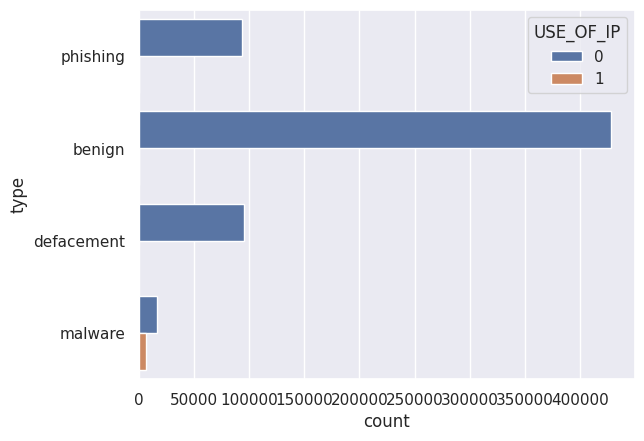

In [ ]:
sns.set(style="darkgrid")
sns.countplot(y="type", data=df,hue="USE_OF_IP")
plt.show()

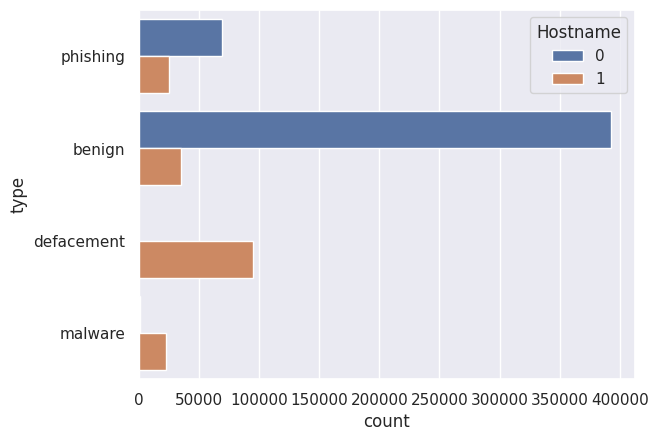

In [ ]:
sns.set(style="darkgrid")
sns.countplot(y="type", data=df,hue="Hostname")
plt.show()

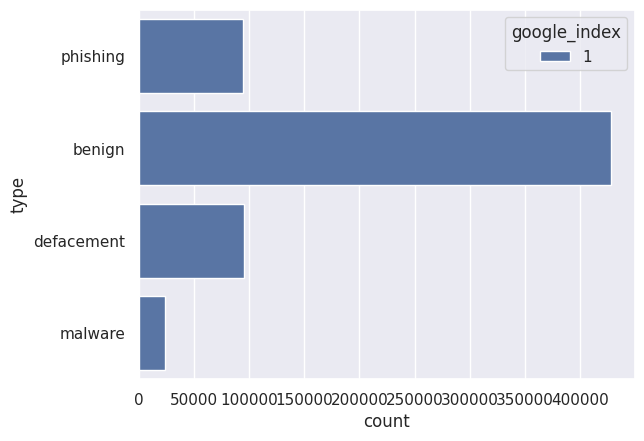

In [ ]:
sns.set(style="darkgrid")
sns.countplot(y="type", data=df,hue="google_index")
plt.show()

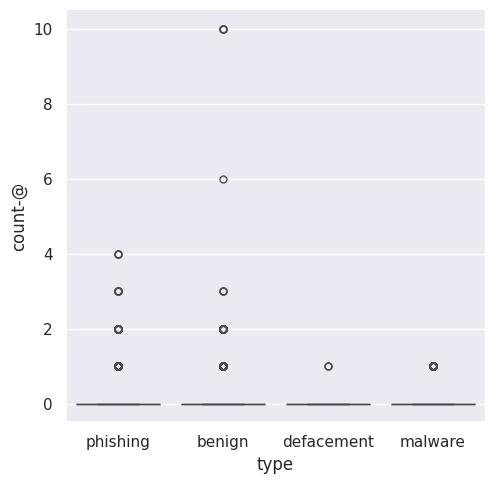

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-@", kind="box", data=df)

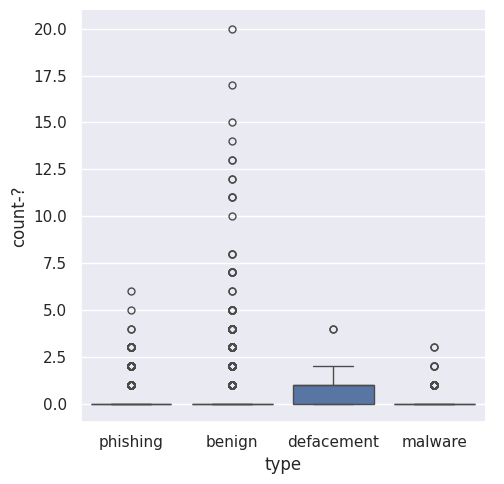

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-?", kind="box", data=df)

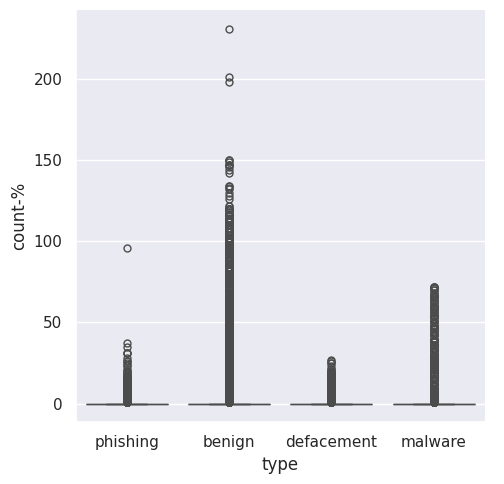

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-%", kind="box", data=df)

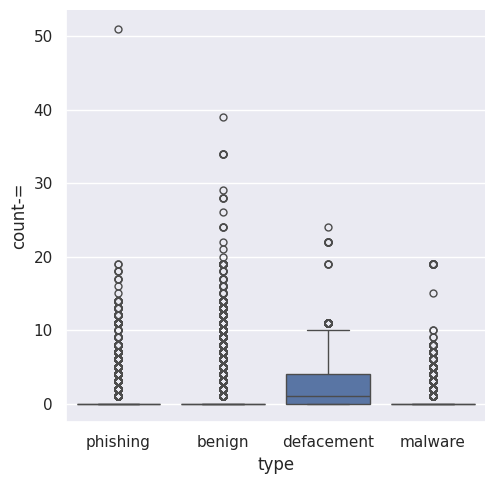

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-=", kind="box", data=df)

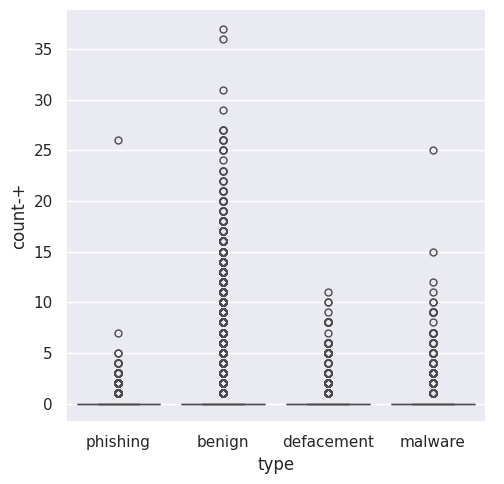

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-+", kind="box", data=df)

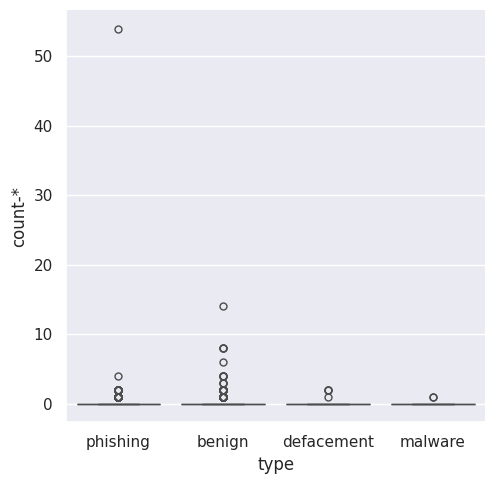

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-*", kind="box", data=df)

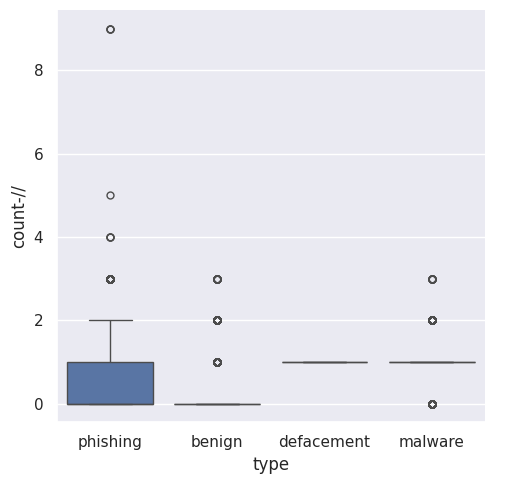

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-//", kind="box", data=df)

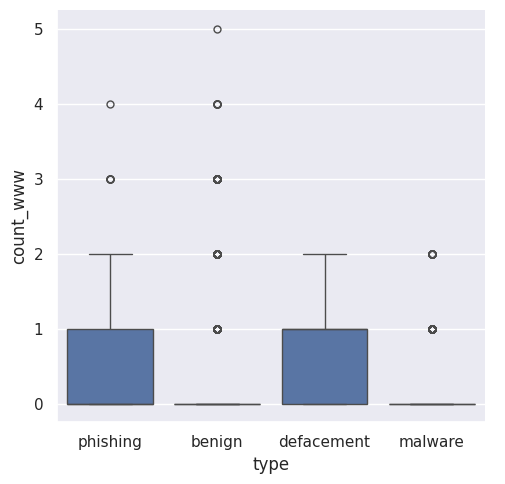

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_www", kind="box", data=df)

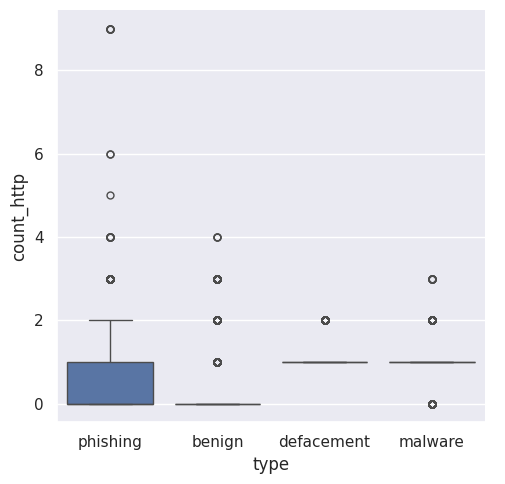

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_http", kind="box", data=df)

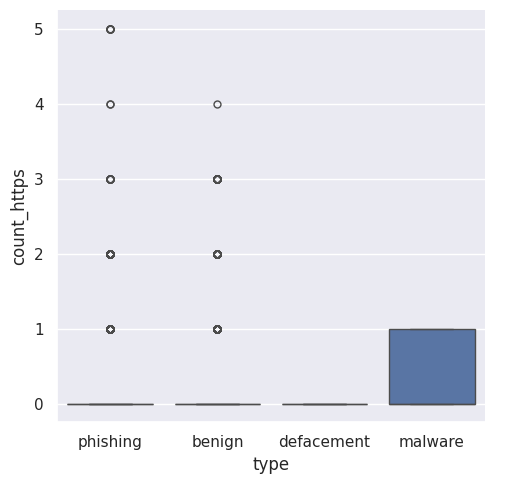

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_https", kind="box", data=df)

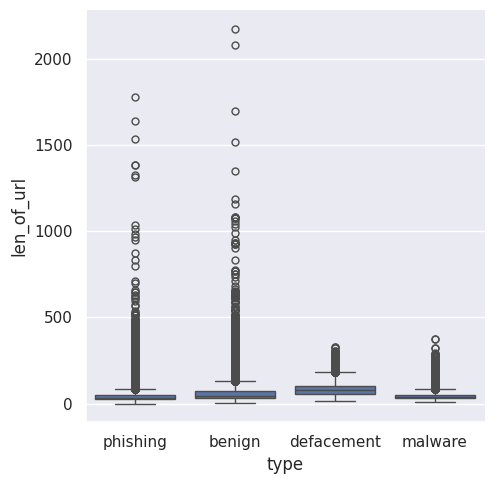

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="len_of_url", kind="box", data=df)

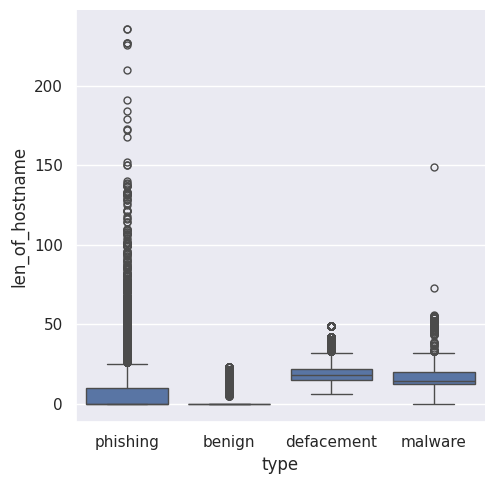

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="len_of_hostname", kind="box", data=df)

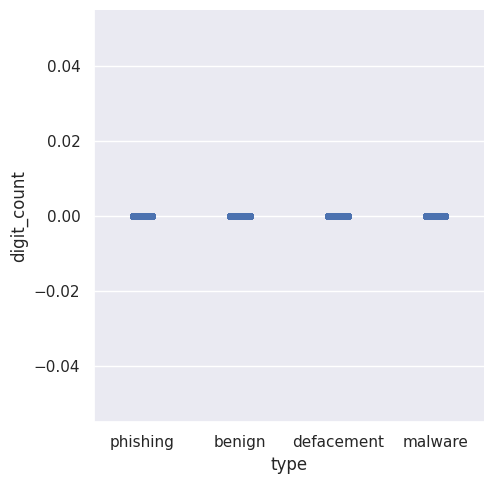

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="digit_count", data=df)

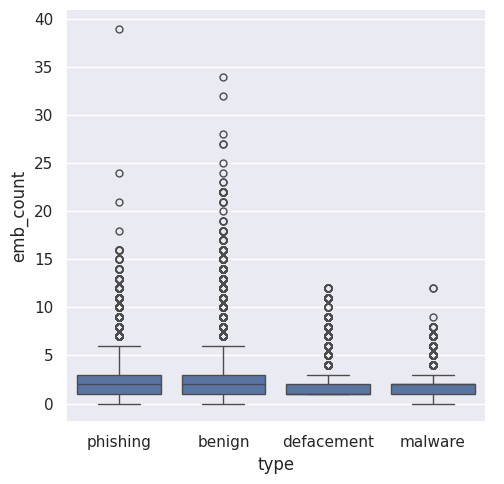

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="emb_count", kind="box", data=df)

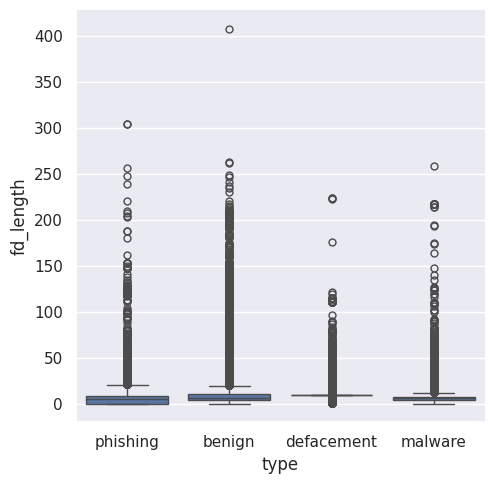

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="box", data=df)

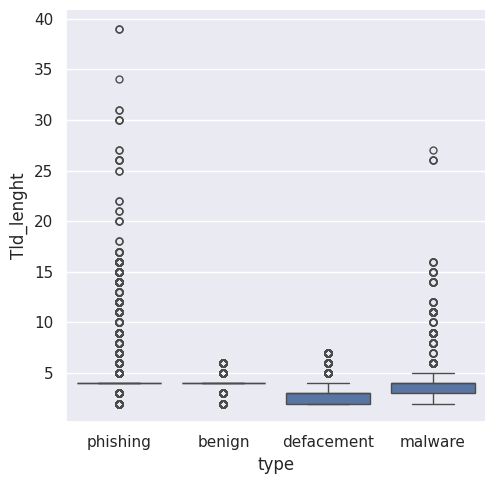

In [ ]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="Tld_lenght",kind="box",data=df)

In [ ]:
# label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type"] = lb_make.fit_transform(df["type"])
df["type"].value_counts()

0    428080
1     95308
3     94092
2     23645
Name: type, dtype: int64

In [ ]:
df.columns

Index(['url', 'type', 'USE_OF_IP', 'Hostname', 'google_index', 'count-@',
       'count--', 'count-?', 'count.', 'count-%', 'count-=', 'count-+',
       'count-*', 'count-//', 'count_www', 'count_http', 'count_https',
       'len_of_url', 'len_of_hostname', 'digit_count', 'emb_count',
       'fd_length', 'Tld_lenght'],
      dtype='object')

# Train test split

In [ ]:
x = df[['USE_OF_IP', 'Hostname', 'google_index', 'count-@',
       'count--', 'count-?', 'count.', 'count-%', 'count-=', 'count-+',
       'count-*', 'count-//', 'count_www', 'count_http', 'count_https',
       'len_of_url', 'len_of_hostname', 'digit_count', 'emb_count',
       'fd_length', 'Tld_lenght']]

In [ ]:
x

,USE_OF_IP,Hostname,google_index,count-@,count--,count-?,count.,count-%,count-=,count-+,...,count-//,count_www,count_http,count_https,len_of_url,len_of_hostname,digit_count,emb_count,fd_length,Tld_lenght
0,0,0,1,0,1,0,2,0,0,0,...,0,0,0,0,16,0,0,0,0,4
1,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,35,0,0,2,5,4
2,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,31,0,0,3,7,4
3,0,1,1,0,1,1,3,0,4,0,...,1,1,1,0,88,21,0,1,9,2
4,0,1,1,0,1,1,2,0,3,0,...,1,0,1,0,235,23,0,1,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,39,0,0,3,7,4
651187,0,0,1,0,2,0,2,0,0,0,...,0,0,0,0,44,0,0,4,8,4
651188,0,0,1,0,0,0,2,0,0,0,...,0,1,0,0,42,0,0,4,7,4
651189,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,45,0,0,2,4,4


In [ ]:
y = df['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# 1.RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85616
  defacement       0.98      0.99      0.99     19062
    phishing       0.97      0.91      0.94      4729
     malware       0.90      0.85      0.87     18818

    accuracy                           0.96    128225
   macro avg       0.96      0.93      0.94    128225
weighted avg       0.96      0.96      0.96    128225

accuracy:   0.962


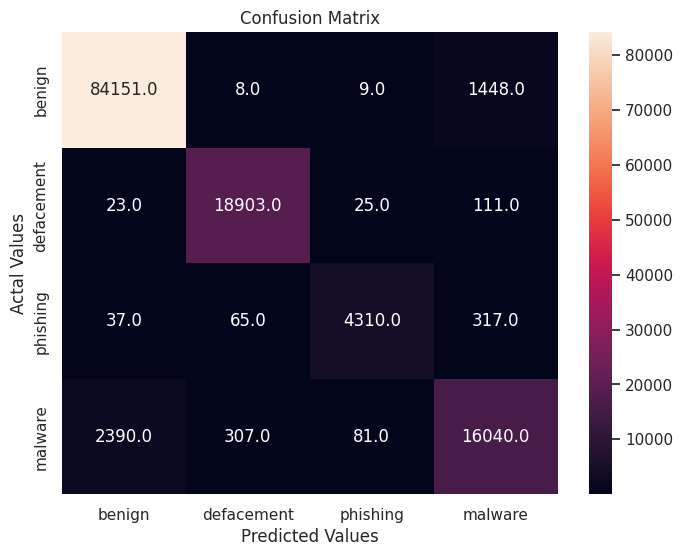

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

<Axes: >

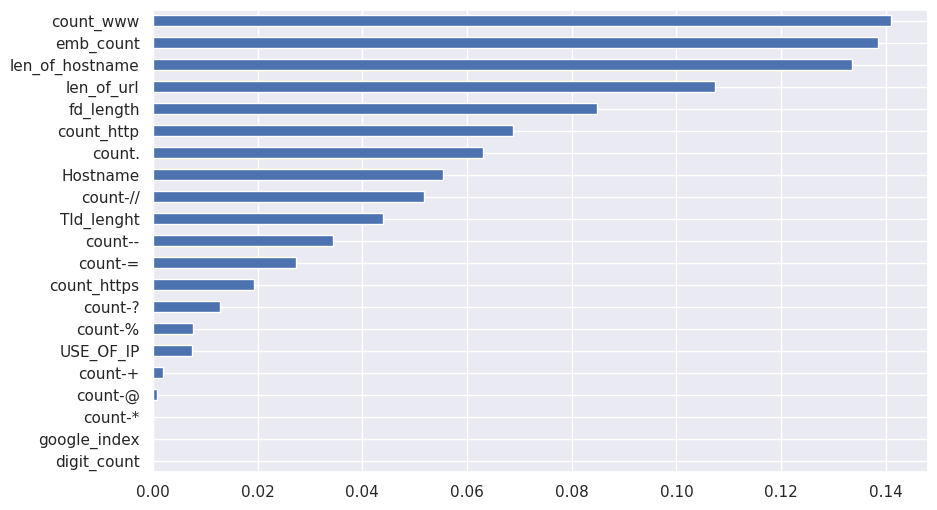

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

# 2.GaussianNaive Baeyes Classifier


In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test,y_pred_nb,target_names=['benign', 'defacement','phishing','malware']))

score = accuracy_score(y_test, y_pred_nb)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.90      0.90      0.90     85616
  defacement       0.66      1.00      0.79     19062
    phishing       0.60      0.60      0.60      4729
     malware       0.71      0.36      0.48     18818

    accuracy                           0.82    128225
   macro avg       0.72      0.71      0.69    128225
weighted avg       0.83      0.82      0.81    128225

accuracy:   0.824


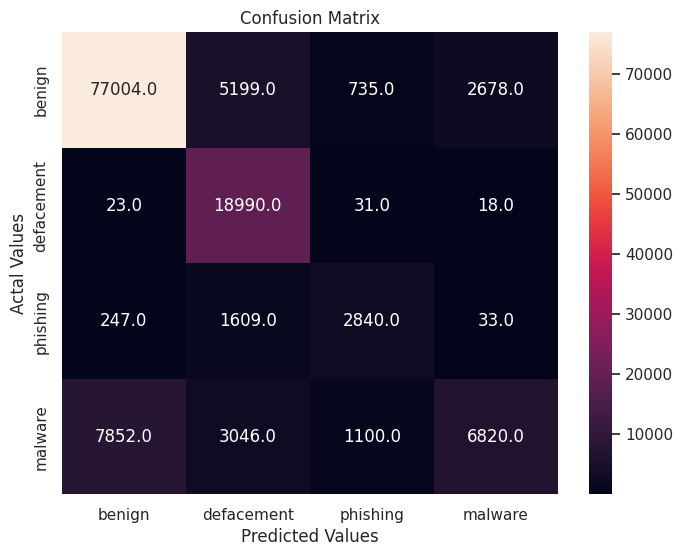

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'],
                     columns = ['benign', 'defacement','phishing','malware'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt=".1f")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()